**Predicting the Value of CO2 Emissionn**

---




Now that you have been equipped with the skills over the course of 'Data Science and Analytics', now you have a chance to practice and apply it on a dataset.

### In this project, you need to build a model to predict the unknown value. ###


#### Thinking like a data scientist, you have to follow the data science methodology, as shown in the image below:

In [1]:
#First step - Business Understanding

### 1- Businuess Understanding

---



Data science methodology begins with spending the time to seek clarification. What is the problem that you are trying to solve?

Our problem here is finding the value of the CO2 Emission.

Main Goal: Predict the value of CO2 emission based on single independent variable.

Main Object: Building a predictive model.

In [2]:
#Second step - Analytic Approach

### 2- Analytic Approach

---



How can you use data to answer the question/solve the problem?

Selecting the right analytic approach to solve the problem. In this project the problem is about predicting the CO2 Emission. So we are going to use Simple Linear Regression algorithm to solve the problem.

In [3]:
#Third step and Fourth step - Requirements Data and Data Collection

### 3- Data Requirements

---



Necessary data content, Data Formats, Sources for initial data collection.

In thin project we need to collect data about the CO2 emission, engine size, and Fuel consumption.



### 4- Data Collection

---



After the initial data collection is performed, an assessment by the data scientist takes place to determine whether or not they have what they need.

In [4]:
#Fifth step - Data Understanding


### 5- Data Understanding

---



Data understanding encompasses all activities related to constructing the data set.

In [5]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-08-22 03:47:50--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   244KB/s    in 0.3s    

2024-08-22 03:47:51 (244 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [6]:
import pandas as pd

df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
#data preparation

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [8]:
df.isnull().sum()

,0
MODELYEAR,0
MAKE,0
MODEL,0
VEHICLECLASS,0
ENGINESIZE,0
CYLINDERS,0
TRANSMISSION,0
FUELTYPE,0
FUELCONSUMPTION_CITY,0
FUELCONSUMPTION_HWY,0


In [9]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [10]:
#Sixth step - Data Preparation

### 6- Data Preparation

---



Together with data collection and data understanding, data preparation is the most time-consuming phase of a data science project, typically taking 70% and even up to even 90% of the overall project time.

In [11]:
#want to see at the numerical column

ndf = df[['MODELYEAR', 'ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]
ndf.corr()

#value of correclation

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [12]:
df_numeric = df.select_dtypes(include=['number'])

df_numeric.corr()  #to see the correlation among the numeric features

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

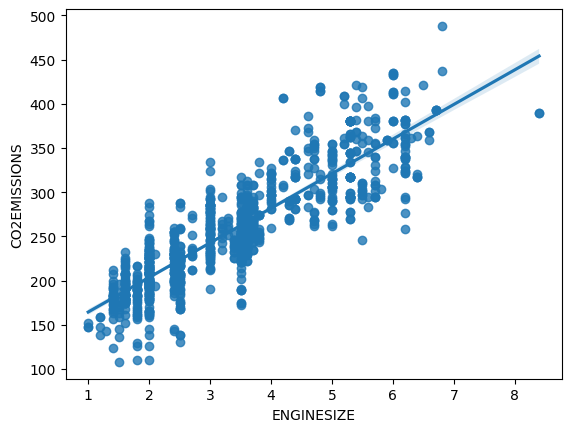

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=df)


<function matplotlib.pyplot.show(close=None, block=None)>

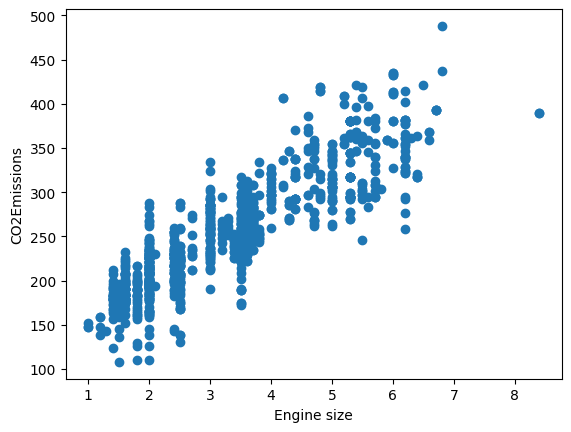

In [14]:
plt.scatter(x="ENGINESIZE", y="CO2EMISSIONS", data=df)
plt.xlabel('Engine size')
plt.ylabel('CO2Emissions')
plt.show

#need to label the graph

<function matplotlib.pyplot.show(close=None, block=None)>

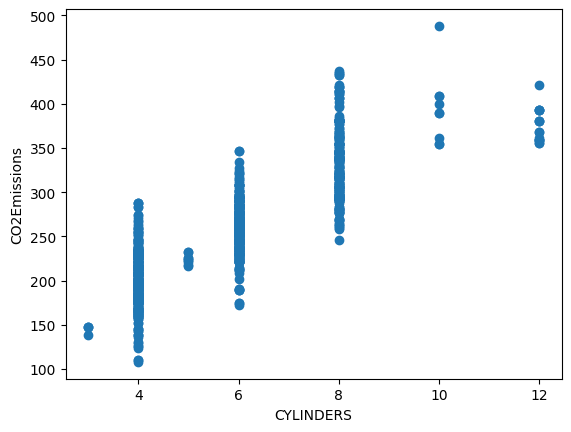

In [15]:
plt.scatter(x="CYLINDERS", y="CO2EMISSIONS", data=df)
plt.xlabel('CYLINDERS')
plt.ylabel('CO2Emissions')
plt.show

<Axes: xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

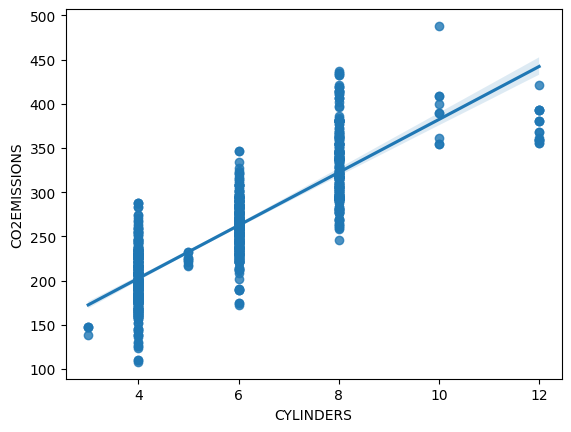

In [16]:
sns.regplot(x="CYLINDERS", y="CO2EMISSIONS", data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

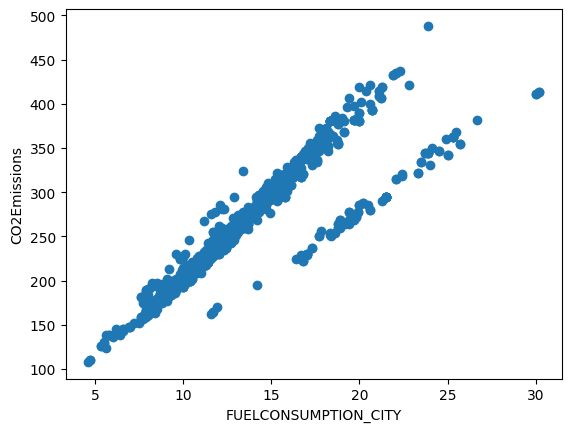

In [17]:
plt.scatter(x="FUELCONSUMPTION_CITY", y="CO2EMISSIONS", data=df)
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2Emissions')
plt.show

<Axes: xlabel='FUELCONSUMPTION_CITY', ylabel='CO2EMISSIONS'>

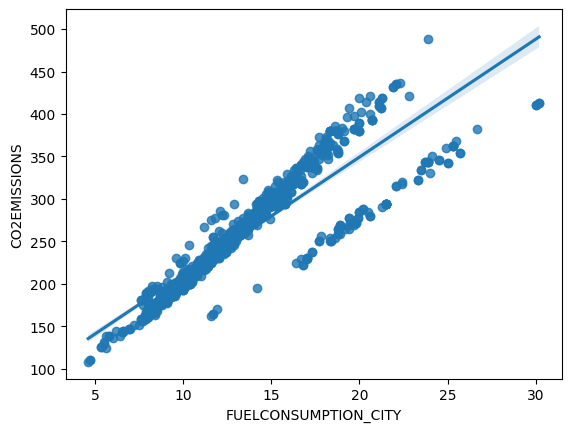

In [18]:
sns.regplot(x="FUELCONSUMPTION_CITY", y="CO2EMISSIONS", data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

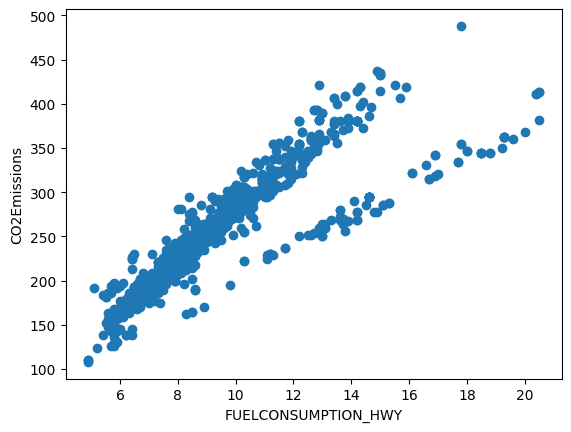

In [19]:
plt.scatter(x="FUELCONSUMPTION_HWY", y="CO2EMISSIONS", data=df)
plt.xlabel('FUELCONSUMPTION_HWY')
plt.ylabel('CO2Emissions')
plt.show

<Axes: xlabel='FUELCONSUMPTION_HWY', ylabel='CO2EMISSIONS'>

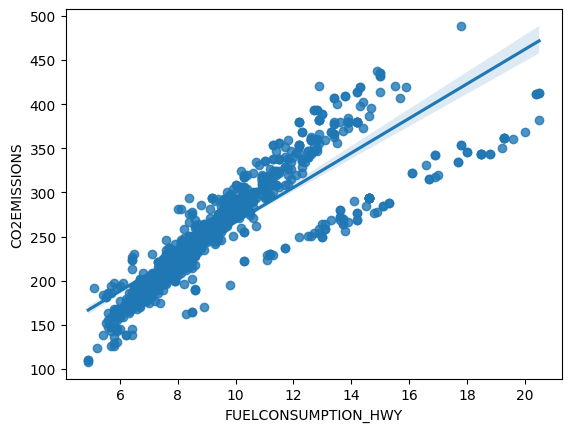

In [20]:
sns.regplot(x="FUELCONSUMPTION_HWY", y="CO2EMISSIONS", data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

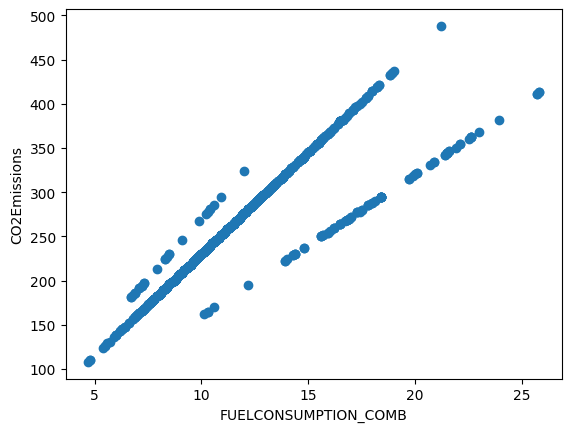

In [21]:
plt.scatter(x="FUELCONSUMPTION_COMB", y="CO2EMISSIONS", data=df)
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2Emissions')
plt.show

<Axes: xlabel='FUELCONSUMPTION_COMB', ylabel='CO2EMISSIONS'>

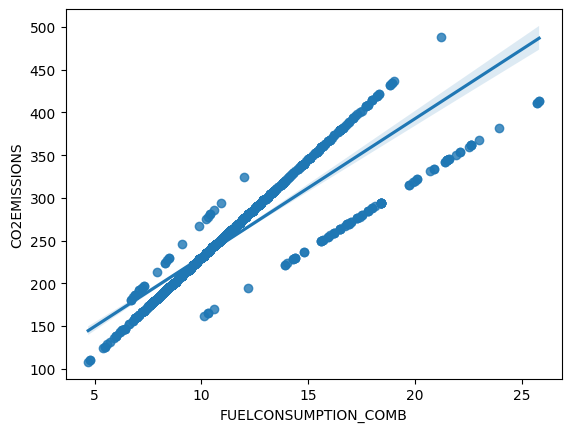

In [22]:
sns.regplot(x="FUELCONSUMPTION_COMB", y="CO2EMISSIONS", data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

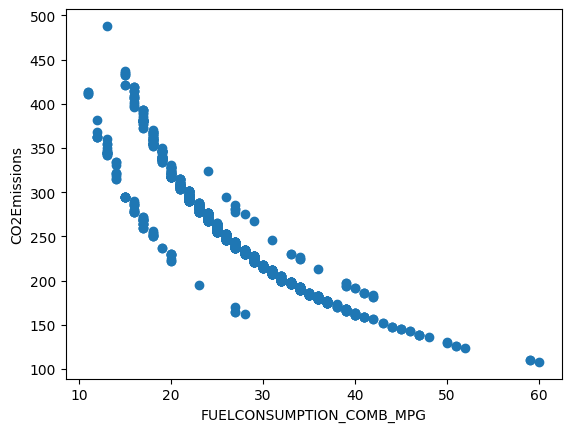

In [23]:
plt.scatter(x="FUELCONSUMPTION_COMB_MPG", y="CO2EMISSIONS", data=df)
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('CO2Emissions')
plt.show

<Axes: xlabel='FUELCONSUMPTION_COMB_MPG', ylabel='CO2EMISSIONS'>

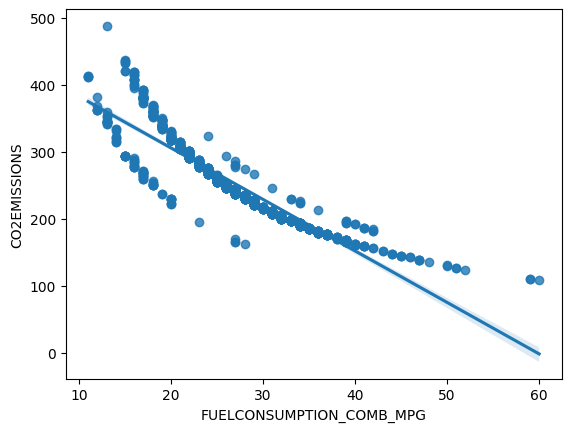

In [24]:
sns.regplot(x="FUELCONSUMPTION_COMB_MPG", y="CO2EMISSIONS", data=df)

In [25]:
#divide the data for training and test

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using *np.random.rand()* function:

In [26]:
import numpy as np

msk = np.random.rand(len(df)) <= 0.8
train = df[msk]
test = df[~msk] #take the rest of the data #randomly choosing

#it mean 80% will be choose randomly

**Train and Test Distribution**

In [27]:
from matplotlib import pyplot as plt


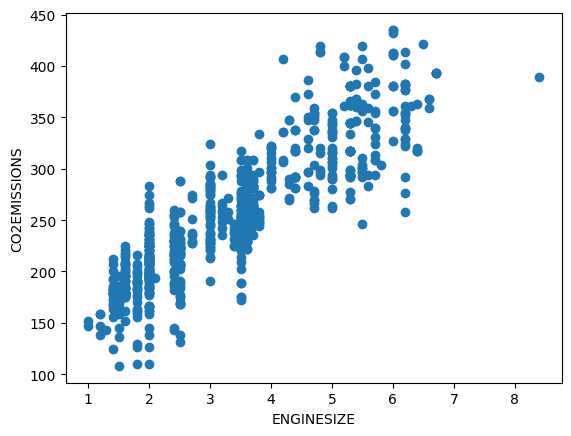

In [28]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)

plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

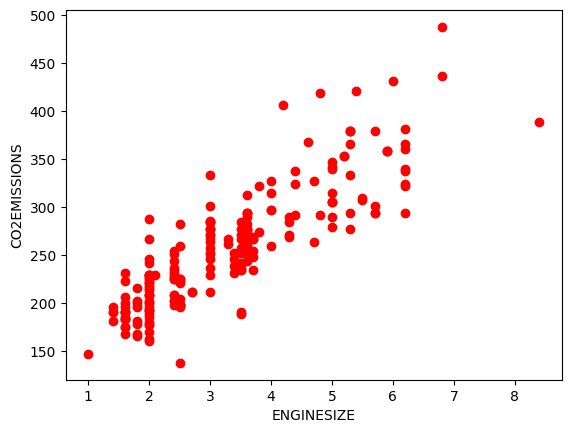

In [29]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red')

plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

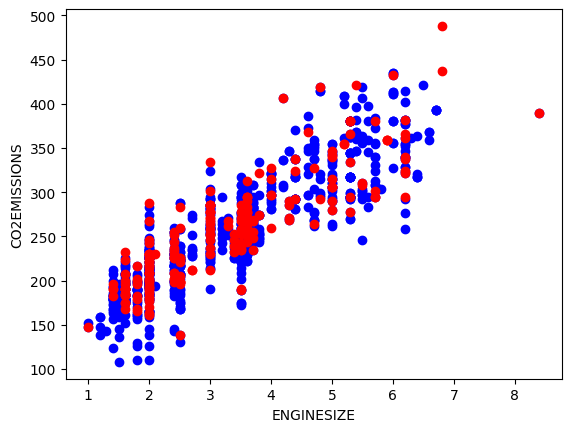

In [30]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red')

plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

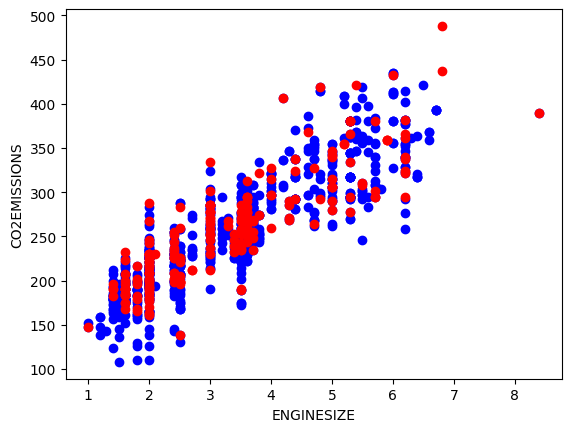

In [32]:
#This is a rerun code since we rerun the data splitting code section
#Notice how the distribution changes from above since we rerun the code (so it gave us a new random train and test set)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [34]:
#Seventh step - Modelling

### 7 - Modelling

---


* Train the dataset using the algorithms
* Test value must be more high than train value during evaluation later

In [35]:
from sklearn import linear_model #call all the linear model - then call algorithm (linear regression)

regr = linear_model.LinearRegression()

#Mention and label the x and y

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
#need to use array - convert from panda

#training
regr.fit (train_x, train_y)

LinearRegression()

In [36]:
#to call intercept value and slope value

print('The value of the slope is:', regr.coef_)
print('The value of the intercept is:', regr.intercept_)

The value of the slope is: [[39.44867104]]
The value of the intercept is: [123.29221575]


In [37]:
x = 2.4

y = regr.intercept_ + regr.coef_ *x

y

array([[217.96902624]])

In [38]:
x = int(df['ENGINESIZE'].sample())  #setiap kali dia run this command will give different value since it take from sample

y = regr.intercept_ + regr.coef_ *x

y

<ipython-input-38-a6e65cef2c14>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x = int(df['ENGINESIZE'].sample())  #setiap kali dia run this command will give different value since it take from sample


array([[320.53557094]])

In [39]:
#Eighth step - Evaluation

### 8 - Evaluation

---


R2 is very important to see how much percentage the features gives impact to our dependant variable which is Y.

In [40]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(train[['ENGINESIZE']])
test_y = np.asanyarray(train[['CO2EMISSIONS']]) #actual test

test_y_ = regr.predict(test_x)

print('The R2 is:', r2_score(test_y, test_y_))

print('The MSE is:', np.mean(test_y_ - test_y)**2)

The R2 is: 0.7704244871953628
The MSE is: 1.2056692832041167e-27


In [41]:
#if you run the command again, it will give the different result since it part of training and test

In [42]:
test_x = np.asanyarray(train[['ENGINESIZE']])
test_y = np.asanyarray(train[['CO2EMISSIONS']]) #actual test

test_y_ = regr.predict(test_x)

print('The R2 is:', round(((r2_score(test_y, test_y_))*100), 2))

print('The MSE is:', np.mean(test_y_ - test_y)**2)

The R2 is: 77.04
The MSE is: 1.2056692832041167e-27


**Trying to check the other related features**

In [43]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [44]:
#FUELCONSUMPTION_COMB_MPG vs CO2EMISSIONS

In [45]:

regr1 = linear_model.LinearRegression()

#Mention and label the x and y

train_x1 = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])

train_y1 = np.asanyarray(train[['CO2EMISSIONS']])
#need to use array - convert from panda

#training
regr1.fit (train_x1, train_y1)

#prediction

test_x1 = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
test_y1 = np.asanyarray(train[['CO2EMISSIONS']]) #actual test

test_y1_ = regr1.predict(test_x1)

#Evaluation

print('The R2 is:', round(((r2_score(test_y1, test_y1_))*100), 2))

print('The MSE is:', round((((np.mean((test_y1_ - test_y1)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y1_ - test_y1))))*100), 2))


The R2 is: 82.38
The MSE is: 71443.76
The MAE is: 1804.33


In [46]:
regr2 = linear_model.LinearRegression()

#Mention and label the x and y

train_x2 = np.asanyarray(train[['CYLINDERS']])

train_y2 = np.asanyarray(train[['CO2EMISSIONS']])
#need to use array - convert from panda

#training
regr2.fit (train_x2, train_y2)

#prediction

test_x2 = np.asanyarray(train[['CYLINDERS']])
test_y2 = np.asanyarray(train[['CO2EMISSIONS']]) #actual test

test_y2_ = regr2.predict(test_x2)

#Evaluation

print('The R2 is:', round(((r2_score(test_y2, test_y2_))*100), 2))

print('The MSE is:', round((((np.mean((test_y2_ - test_y2)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y2_ - test_y2))))*100), 2))


The R2 is: 72.85
The MSE is: 110073.44
The MAE is: 2569.11


In [47]:
regr3 = linear_model.LinearRegression()

#Mention and label the x and y

train_x3 = np.asanyarray(train[['FUELCONSUMPTION_CITY']])

train_y3 = np.asanyarray(train[['CO2EMISSIONS']])
#need to use array - convert from panda

#training
regr3.fit (train_x3, train_y3)

#prediction

test_x3 = np.asanyarray(train[['FUELCONSUMPTION_CITY']])
test_y3 = np.asanyarray(train[['CO2EMISSIONS']]) #actual test

test_y3_ = regr3.predict(test_x3)

#Evaluation

print('The R2 is:', round(((r2_score(test_y3, test_y3_))*100), 2))

print('The MSE is:', round((((np.mean((test_y3_ - test_y3)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y3_ - test_y3))))*100), 2))

The R2 is: 80.63
The MSE is: 78553.74
The MAE is: 1989.53


In [48]:
regr4 = linear_model.LinearRegression()

#Mention and label the x and y

train_x4 = np.asanyarray(train[['FUELCONSUMPTION_HWY']])

train_y4 = np.asanyarray(train[['CO2EMISSIONS']])
#need to use array - convert from panda

#training
regr4.fit (train_x4, train_y4)

#prediction

test_x4 = np.asanyarray(train[['FUELCONSUMPTION_HWY']])
test_y4 = np.asanyarray(train[['CO2EMISSIONS']]) #actual test

test_y4_ = regr4.predict(test_x4)

#Evaluation

print('The R2 is:', round(((r2_score(test_y4, test_y4_))*100), 2))

print('The MSE is:', round((((np.mean((test_y4_ - test_y4)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y4_ - test_y4))))*100), 2))

The R2 is: 74.04
The MSE is: 105261.78
The MAE is: 2460.45


In [49]:
regr5 = linear_model.LinearRegression()

#Mention and label the x and y

train_x5 = np.asanyarray(train[['FUELCONSUMPTION_COMB']])

train_y5 = np.asanyarray(train[['CO2EMISSIONS']])
#need to use array - convert from panda

#training
regr5.fit (train_x5, train_y5)

#prediction

test_x5 = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
test_y5 = np.asanyarray(train[['CO2EMISSIONS']]) #actual test

test_y5_ = regr5.predict(test_x5)

#Evaluation

print('The R2 is:', round(((r2_score(test_y5, test_y5_))*100), 2))

print('The MSE is:', round((((np.mean((test_y5_ - test_y5)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y5_ - test_y5))))*100), 2))

The R2 is: 79.46
The MSE is: 83288.47
The MAE is: 2087.73


In [50]:
#multiple linear regression

**Multiple Linear Regression**

---



In [51]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [52]:
regr6 = linear_model.LinearRegression()

#Mention and label the x and y

train_x6 = np.asanyarray(train[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])

train_y6 = np.asanyarray(train[['CO2EMISSIONS']])
#need to use array - convert from panda

#training
regr6.fit (train_x6, train_y6)

#prediction

test_x6 = np.asanyarray(train[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
test_y6 = np.asanyarray(train[['CO2EMISSIONS']]) #actual test

test_y6_ = regr6.predict(test_x6)

#Evaluation

print('The R2 is:', round(((r2_score(test_y6, test_y6_))*100), 2))

print('The MSE is:', round((((np.mean((test_y6_ - test_y6)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y6_ - test_y6))))*100), 2))

The R2 is: 80.72
The MSE is: 78156.49
The MAE is: 1977.98


In [53]:
#boleh letak many variable x


In [54]:
regr7 = linear_model.LinearRegression()

#Mention and label the x and y

train_x7 = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']])

train_y7 = np.asanyarray(train[['CO2EMISSIONS']])
#need to use array - convert from panda

#training
regr7.fit (train_x7, train_y7)

#prediction

test_x7 = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']])
test_y7 = np.asanyarray(train[['CO2EMISSIONS']]) #actual test

test_y7_ = regr7.predict(test_x7)

#Evaluation

print('The R2 is:', round(((r2_score(test_y7, test_y7_))*100), 2))

print('The MSE is:', round((((np.mean((test_y7_ - test_y7)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y7_ - test_y7))))*100), 2))

The R2 is: 89.12
The MSE is: 44111.83
The MAE is: 1403.04


In [55]:
regr8 = linear_model.LinearRegression()

#Mention and label the x and y

train_x8 = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS']])

train_y8 = np.asanyarray(train[['CO2EMISSIONS']])
#need to use array - convert from panda

#training
regr8.fit (train_x8, train_y8)

#prediction

test_x8 = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS']])
test_y8 = np.asanyarray(train[['CO2EMISSIONS']]) #actual test

test_y8_ = regr8.predict(test_x8)

#Evaluation

print('The R2 is:', round(((r2_score(test_y8, test_y8_))*100), 2))

print('The MSE is:', round((((np.mean((test_y8_ - test_y8)**2)))*100), 2))

print('The MAE is:', round ((((np.mean(np.absolute(test_y8_ - test_y8))))*100), 2))

The R2 is: 77.86
The MSE is: 89788.02
The MAE is: 2308.88
